In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/andreas/Desktop/Cyberlens/Pre-interview_assessment/vulnerable_robot_challenge.csv")

In [3]:
normal = df.loc[df['flag'] == 0, :]
normal.describe()

,t,CPU,RxKBTot,TxKBTot,WriteKBTot,Watts,Amps,RMS,diff_encoder_l,flag
count,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.0
mean,171.991452,23.350803,244.917846,14.778896,0.923035,89.733106,0.566935,0.158382,17.305770,0.0
std,33.230427,9.146263,1353.260313,77.508104,1.511957,9.041810,0.059048,0.087423,8.762966,0.0
min,112.220000,0.000000,0.000000,0.000000,0.000000,62.700000,0.401004,0.008099,0.000012,0.0
25%,148.580000,26.000000,1.000000,0.960000,0.000000,84.000000,0.536825,0.106521,11.200000,0.0
50%,164.970000,26.800000,1.000000,1.000000,0.000000,92.700000,0.587531,0.148595,18.000000,0.0
75%,199.645000,27.000000,1.000000,1.000000,1.520000,98.176835,0.614895,0.196046,22.943282,0.0
max,228.780000,42.000000,8801.000000,506.000000,10.000000,101.199602,0.635988,1.136100,89.718974,0.0


In [4]:
anomaly = df.loc[df['flag'] == 1, :]
anomaly.describe()

,t,CPU,RxKBTot,TxKBTot,WriteKBTot,Watts,Amps,RMS,diff_encoder_l,flag
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.0
mean,173.063281,18.942756,4333.229184,244.369484,1.369172,87.776590,0.566919,0.159151,14.446373,1.0
std,25.462097,7.969489,4321.163783,244.466168,1.907361,7.370592,0.058446,0.137175,8.305075,0.0
min,122.000000,1.000000,0.000000,0.000000,0.000000,62.575296,0.400111,0.008062,0.000000,1.0
25%,157.995000,11.240000,0.960000,0.000000,0.000000,83.900000,0.542000,0.080659,10.396769,1.0
50%,177.000000,12.870000,2892.570000,119.340000,0.560000,92.479720,0.592000,0.126455,13.000000,1.0
75%,192.005000,27.000000,8695.620000,498.280000,2.160000,93.200000,0.603124,0.187214,20.333341,1.0
max,215.000000,41.000000,8810.000000,508.000000,11.000000,98.743706,0.631980,1.817189,84.166746,1.0


In [5]:
normal.shape[1]

10

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pylab import rcParams
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

In [121]:

df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)
df_train, df_valid = train_test_split(df_train, test_size=0.2, random_state=123)

df_train_0 = df_train.loc[df['flag'] == 0]
df_train_1 = df_train.loc[df['flag'] == 1]

df_train_0_x = df_train_0.drop(['flag'], axis=1)
df_train_1_x = df_train_1.drop(['flag'], axis=1)




df_valid_0 = df_valid.loc[df['flag'] == 0]
df_valid_1 = df_valid.loc[df['flag'] == 1]

df_valid_0_x = df_valid_0.drop(['flag'], axis=1)
df_valid_1_x = df_valid_1.drop(['flag'], axis=1)




df_test_0 = df_test.loc[df['flag'] == 0]
df_test_1 = df_test.loc[df['flag'] == 1]

df_test_0_x = df_test_0.drop(['flag'], axis=1)
df_test_1_x = df_test_1.drop(['flag'], axis=1)

In [122]:
df_train_0_x

,t,CPU,RxKBTot,TxKBTot,WriteKBTot,Watts,Amps,RMS,diff_encoder_l
6996,190.00,27.00,0.00,0.00,0.00,81.187923,0.635349,0.214701,1.000000
5424,205.96,1.00,1.00,1.00,2.88,93.860080,0.590000,0.279603,20.266667
8901,228.10,26.00,1.00,1.00,0.00,98.037639,0.613312,0.118365,38.241314
49,113.20,28.00,1.00,1.80,0.60,84.189631,0.541264,0.123714,12.600003
30,112.82,27.82,1.18,1.82,0.00,84.300000,0.541967,0.281456,13.000000
...,...,...,...,...,...,...,...,...,...
5989,169.86,26.86,1.00,1.00,0.00,97.400000,0.612000,0.170398,22.000000
8365,217.38,26.38,0.00,0.00,0.00,73.452877,0.406760,0.033516,20.833333
8443,218.94,26.06,0.00,0.00,0.00,63.562500,0.432440,0.025139,6.276757
7121,192.50,34.00,1.00,0.00,1.50,100.601511,0.621338,0.137410,24.200010


In [10]:
scaler = StandardScaler().fit(df_train_0_x)

df_train_0_x_rescaled = scaler.transform(df_train_0_x)


df_valid_0_x_rescaled = scaler.transform(df_valid_0_x)


df_valid_x_rescaled = scaler.transform(df_valid.drop(['flag'], axis = 1))


df_test_0_x_rescaled = scaler.transform(df_test_0_x)
df_test_x_rescaled = scaler.transform(df_test.drop(['flag'], axis = 1))

In [39]:
df_test_0_x_rescaled

array([[-0.46464569,  0.44944977, -0.1791878 , ..., -0.51561346,
        -1.09704824, -0.72535062],
       [-0.52820694,  0.4670123 , -0.1791878 , ..., -0.53457914,
        -0.36535961, -0.71014379],
       [ 0.70524124,  0.34187928, -0.1791878 , ...,  0.82351609,
         0.06156427,  0.37336108],
       ...,
       [ 1.0572267 , -2.45714901, -0.1791878 , ...,  0.39245743,
        -0.90281767,  0.31633451],
       [-0.24877726,  0.28699637, -0.1791878 , ...,  0.85847574,
        -0.18051947,  0.22509352],
       [-1.56317611,  0.4670123 , -0.1791878 , ..., -0.52641414,
        -0.16274882, -0.72154916]])

In [12]:
df_train_0_x_rescaled.shape[1]

9

In [109]:
nb_epoch = 300
batch_size = 128
input_dim = df_train_0_x_rescaled.shape[1] 
encoding_dim = 6
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-3

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(50, activation="relu")(encoder)

encoder = Dense(25, activation="relu")(encoder)

encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(25, activation="relu")(decoder)
decoder = Dense(50, activation="relu")(decoder)

decoder = Dense(encoding_dim, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_63 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_64 (Dense)             (None, 50)                350       
_________________________________________________________________
dense_65 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_66 (Dense)             (None, 3)                 78        
_________________________________________________________________
dense_67 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_68 (Dense)             (None, 25)                100 

In [110]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')
cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
                               save_best_only=True,
                               verbose=0)

history = autoencoder.fit(df_train_0_x_rescaled, df_train_0_x_rescaled,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(df_valid_0_x_rescaled, df_valid_0_x_rescaled),
                    verbose=1,
                    callbacks=[cp]).history

Epoch 1/300
21/21 [==============================] - 0s 8ms/step - loss: 1.0022 - accuracy: 0.2086 - val_loss: 1.0600 - val_accuracy: 0.2570
Epoch 2/300
21/21 [==============================] - 0s 5ms/step - loss: 0.9959 - accuracy: 0.2239 - val_loss: 1.0489 - val_accuracy: 0.2554
Epoch 3/300
21/21 [==============================] - 0s 4ms/step - loss: 0.9786 - accuracy: 0.2834 - val_loss: 1.0190 - val_accuracy: 0.3344
Epoch 4/300
21/21 [==============================] - 0s 5ms/step - loss: 0.9328 - accuracy: 0.3413 - val_loss: 0.9646 - val_accuracy: 0.3297
Epoch 5/300
21/21 [==============================] - 0s 5ms/step - loss: 0.8845 - accuracy: 0.3200 - val_loss: 0.9218 - val_accuracy: 0.3498
Epoch 6/300
21/21 [==============================] - 0s 5ms/step - loss: 0.8456 - accuracy: 0.3327 - val_loss: 0.8882 - val_accuracy: 0.3375
Epoch 7/300
21/21 [==============================] - 0s 4ms/step - loss: 0.8163 - accuracy: 0.3181 - val_loss: 0.8634 - val_accuracy: 0.3111
Epoch 8/300
2

Epoch 59/300
21/21 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.3510 - val_loss: 0.4794 - val_accuracy: 0.3529
Epoch 60/300
21/21 [==============================] - 0s 10ms/step - loss: 0.4308 - accuracy: 0.3499 - val_loss: 0.4767 - val_accuracy: 0.3529
Epoch 61/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4308 - accuracy: 0.3473 - val_loss: 0.4749 - val_accuracy: 0.3514
Epoch 62/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.3480 - val_loss: 0.4740 - val_accuracy: 0.3514
Epoch 63/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.3488 - val_loss: 0.4730 - val_accuracy: 0.3483
Epoch 64/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.3503 - val_loss: 0.4718 - val_accuracy: 0.3483
Epoch 65/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4258 - accuracy: 0.3492 - val_loss: 0.4713 - val_accuracy: 0.3452
Epoch

21/21 [==============================] - 0s 4ms/step - loss: 0.3947 - accuracy: 0.3768 - val_loss: 0.4310 - val_accuracy: 0.3793
Epoch 174/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3947 - accuracy: 0.3630 - val_loss: 0.4307 - val_accuracy: 0.3746
Epoch 175/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.3716 - val_loss: 0.4311 - val_accuracy: 0.3824
Epoch 176/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.3626 - val_loss: 0.4304 - val_accuracy: 0.3932
Epoch 177/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.3738 - val_loss: 0.4313 - val_accuracy: 0.3808
Epoch 178/300
21/21 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.3652 - val_loss: 0.4309 - val_accuracy: 0.3808
Epoch 179/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.3649 - val_loss: 0.4301 - val_accuracy: 0.3870
Epoch 180/300

21/21 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.3548 - val_loss: 0.4242 - val_accuracy: 0.3653
Epoch 288/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.3630 - val_loss: 0.4249 - val_accuracy: 0.3591
Epoch 289/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.3604 - val_loss: 0.4243 - val_accuracy: 0.3777
Epoch 290/300
21/21 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.3641 - val_loss: 0.4246 - val_accuracy: 0.3777
Epoch 291/300
21/21 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.3652 - val_loss: 0.4246 - val_accuracy: 0.3731
Epoch 292/300
21/21 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.3682 - val_loss: 0.4243 - val_accuracy: 0.3700
Epoch 293/300
21/21 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.3723 - val_loss: 0.4245 - val_accuracy: 0.3870
Epoch 294/300

In [111]:
valid_x_predictions = autoencoder.predict(df_valid_x_rescaled)
mse = np.mean(np.power(df_valid_x_rescaled - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_valid['flag']})

In [112]:
len(error_df)

1430

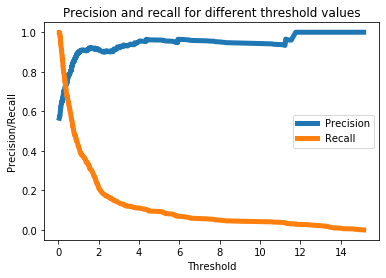

In [113]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

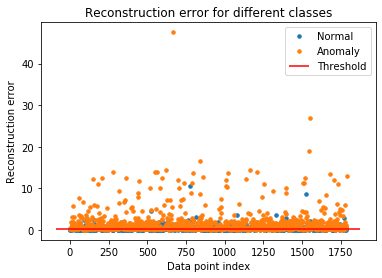

In [117]:
test_x_predictions = autoencoder.predict(df_test_x_rescaled)
mse = np.mean(np.power(df_test_x_rescaled - test_x_predictions, 2), axis=1)
error_df_test = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_test['flag']})
error_df_test = error_df_test.reset_index()
threshold_fixed = 0.2
groups = error_df_test.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomaly" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [118]:
value = 0
j =0
for i in range(len(error_df_test)):
    if (error_df_test.True_class[i] == 0 ):
        value = value + error_df_test.Reconstruction_error[i]
        j = j+1
mesi = value/j
mesi

0.3987309447850409

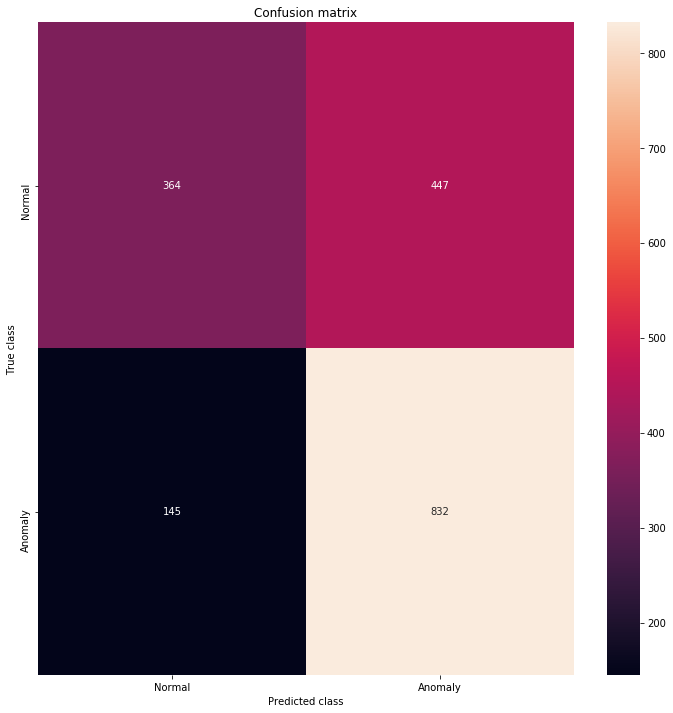

In [119]:
LABELS = ["Normal","Anomaly"]


pred_y = [1 if e > threshold_fixed else 0 for e in error_df_test.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df_test.True_class, pred_y)

plt.figure(figsize=(12, 12))

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");


plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

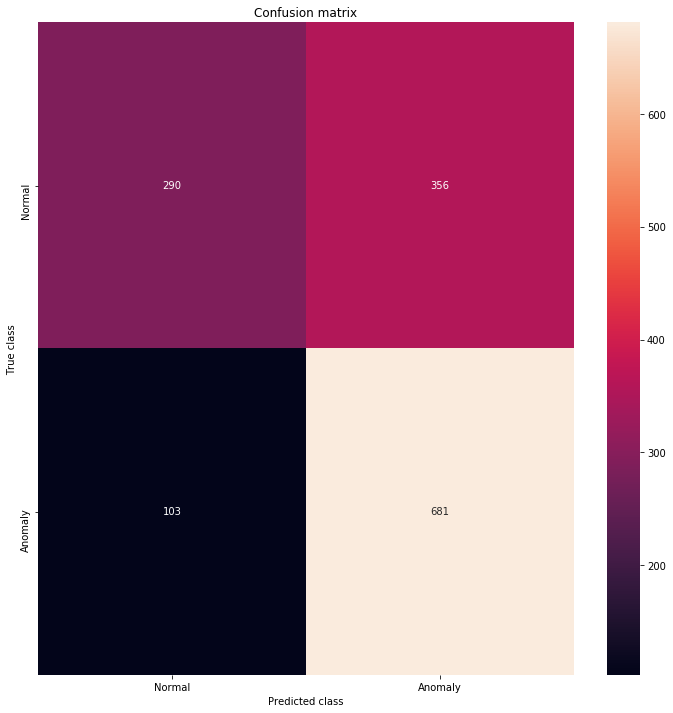

In [120]:

LABELS = ["Normal","Anomaly"]


pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");


plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

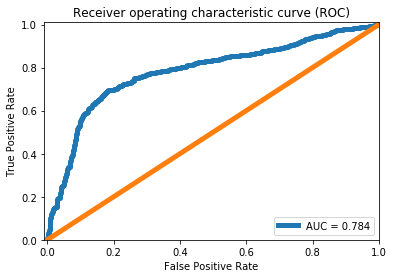

In [31]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()